In [43]:
# import lib
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
#import klib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
%pylab inline

from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor 
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
from  sklearn.model_selection import train_test_split ,cross_val_score
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm 

Populating the interactive namespace from numpy and matplotlib


In [3]:
#set option 
pd.set_option('display.max_rows', 100)   # max row --> will show 100 row , none --< all 
pd.set_option('display.max_columns', None) # max colum
#pd.set_option('display.width', None) # max widh in coolum
#pd.set_option('display.max_colwidth', -1) # max col width
pd.options.display.float_format = '{:.5f}'.format  # to get rid off e to the power value
# to reset all 
#pd.reset_option('all')

In [4]:
#read csv
df = pd.read_csv('AirBnB_US_2021.csv' ,index_col = 0 )
print(df.shape)

(201709, 75)


In [5]:
df.head(2)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,City
0,108061,https://www.airbnb.com/rooms/108061,20210710190015,2021-07-10,Walk to stores/parks/downtown. Fenced yard/Pet...,Walk to town in ten minutes! Monthly rental in...,"I love my neighborhood! Its friendly, easy-goi...",https://a0.muscache.com/pictures/41011975/0cdf...,320564,https://www.airbnb.com/users/show/320564,Lisa,2010-12-16,"Asheville, North Carolina, United States",I am a long time resident of Asheville and am ...,within a day,67%,25%,f,https://a0.muscache.com/im/users/320564/profil...,https://a0.muscache.com/im/users/320564/profil...,NaN,2.00000,2.00000,"['email', 'phone', 'facebook', 'reviews', 'off...",t,t,"Asheville, North Carolina, United States",28801,NaN,35.60670,-82.55563,Entire apartment,Entire home/apt,2,NaN,1 bath,1.00000,1.00000,"[""Microwave"", ""Free parking on premises"", ""Ded...",$82.00,30,365,30.00000,30.00000,1125.00000,1125.00000,30.00000,1125.00000,NaN,t,0,1,1,217,2021-07-10,89,0,0,2011-09-21,2019-11-30,4.49000,4.57000,4.70000,4.85000,4.79000,4.84000,4.48000,NaN,f,2,2,0,0,0.75000,Ashville
1,155305,https://www.airbnb.com/rooms/155305,20210710190015,2021-07-10,Cottage! BonPaul + Sharky's Hostel,<b>The space</b><br />Private cottage located ...,"We are within easy walk of pubs, breweries, mu...",https://a0.muscache.com/pictures/8880711/cf38d...,746673,https://www.airbnb.com/users/show/746673,BonPaul,2011-06-26,"Asheville, North Carolina, United States",We operate two traveler's hostels located in H...,within an hour,100%,99%,t,https://a0.muscache.com/im/pictures/user/4dff7...,https://a0.muscache.com/im/pictures/user/4dff7...,NaN,7.00000,7.00000,"['email', 'phone', 'facebook', 'reviews', 'off...",t,t,"Asheville, North Carolina, United States",28806,NaN,35.57864,-82.59578,Entire guesthouse,Entire home/apt,2,NaN,1 bath,1.00000,1.00000,"[""Stove"", ""Microwave"", ""Free parking on premis...",$91.00,1,365,1.00000,1.00000,7.00000,1125.00000,1.00000,201.70000,NaN,t,13,33,48,130,2021-07-10,319,70,9,2016-08-29,2021-07-10,4.57000,4.68000,4.38000,4.81000,4.76000,4.92000,4.51000,NaN,t,7,1,2,4,5.39000,Ashville


In [56]:
# remane the city colum 
df.rename(columns = {'City':'city'} , inplace =True)

In [57]:
df.head(5)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,city
0,108061,https://www.airbnb.com/rooms/108061,20210710190015,2021-07-10,Walk to stores/parks/downtown. Fenced yard/Pet...,Walk to town in ten minutes! Monthly rental in...,"I love my neighborhood! Its friendly, easy-goi...",https://a0.muscache.com/pictures/41011975/0cdf...,320564,https://www.airbnb.com/users/show/320564,Lisa,2010-12-16,"Asheville, North Carolina, United States",I am a long time resident of Asheville and am ...,within a day,67%,25%,f,https://a0.muscache.com/im/users/320564/profil...,https://a0.muscache.com/im/users/320564/profil...,NaN,2.00000,2.00000,"['email', 'phone', 'facebook', 'reviews', 'off...",t,t,"Asheville, North Carolina, United States",28801,NaN,35.60670,-82.55563,Entire apartment,Entire home/apt,2,NaN,1 bath,1.00000,1.00000,"[""Microwave"", ""Free parking on premises"", ""Ded...",$82.00,30,365,30.00000,30.00000,1125.00000,1125.00000,30.00000,1125.00000,NaN,t,0,1,1,217,2021-07-10,89,0,0,2011-09-21,2019-11-30,4.49000,4.57000,4.70000,4.85000,4.79000,4.84000,4.48000,NaN,f,2,2,0,0,0.75000,Ashville
1,155305,https://www.airbnb.com/rooms/155305,20210710190015,2021-07-10,Cottage! BonPaul + Sharky's Hostel,<b>The space</b><br />Private cottage located ...,"We are within easy walk of pubs, breweries, mu...",https://a0.muscache.com/pictures/8880711/cf38d...,746673,https://www.airbnb.com/users/show/746673,BonPaul,2011-06-26,"Asheville, North Carolina, United States",We operate two traveler's hostels located in H...,within an hour,100%,99%,t,https://a0.muscache.com/im/pictures/user/4dff7...,https://a0.muscache.com/im/pictures/user/4dff7...,NaN,7.00000,7.00000,"['email', 'phone', 'facebook', 'reviews', 'off...",t,t,"Asheville, North Carolina, United States",28806,NaN,35.57864,-82.59578,Entire guesthouse,Entire home/apt,2,NaN,1 bath,1.00000,1.00000,"[""Stove"", ""Microwave"", ""Free parking on premis...",$91.00,1,365,1.00000,1.00000,7.00000,1125.00000,1.00000,201.70000,NaN,t,13,33,48,130,2021-07-10,319,70,9,2016-08-29,2021-07-10,4.57000,4.68000,4.38000,4.81000,4.76000,4.92000,4.51000,NaN,t,7,1,2,4,5.39000,Ashville
2,156805,https://www.airbnb.com/rooms/156805,20210710190015,2021-07-10,"Private Room ""Ader"" at BPS Hostel",<b>The space</b><br />Private Rooms at Bon Pau...,"Easy walk to pubs, cafes, bakery, breweries, l...",https://a0.muscache.com/pictures/23447d55-fa7e...,746673,https://www.airbnb.com/users/show/746673,BonPaul,2011-06-26,"Asheville, North Carolina, United States",We operate two traveler's hostels located in H...,within an hour,100%,99%,t,https://a0.muscache.com/im/pictures/user/4dff7...,https://a0.muscache.com/im/pictures/user/4dff7...,NaN,7.00000,7.00000,"['email', 'phone', 'facebook', 'reviews', 'off

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201709 entries, 0 to 8032
Data columns (total 75 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   id                                            201709 non-null  int64  
 1   listing_url                                   201709 non-null  object 
 2   scrape_id                                     201709 non-null  int64  
 3   last_scraped                                  201709 non-null  object 
 4   name                                          201691 non-null  object 
 5   description                                   197088 non-null  object 
 6   neighborhood_overview                         130478 non-null  object 
 7   picture_url                                   201708 non-null  object 
 8   host_id                                       201709 non-null  int64  
 9   host_url                                      2017

In [59]:
df_new = df.copy()
# all the updates have been done on this dataframe, the original dataFrame is untouched

In [60]:
df_useful_col = pd.read_excel('df_useful_col.xlsx'  , header =None ,names = ['useful_col'])
df_useful_col = df_useful_col.useful_col.to_list()
df_useful_col

['host_id',
 'host_since',
 'host_location',
 'host_response_time',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_listings_count',
 'host_total_listings_count',
 'host_identity_verified',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'latitude',
 'longitude',
 'room_type',
 'accommodates',
 'bathrooms_text',
 'bedrooms',
 'beds',
 'amenities',
 'price',
 'minimum_nights',
 'has_availability',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews_ltm',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'instant_bookable',
 'calculated_host_listings_count',
 'reviews_per_month',
 'city',
 'calculated_host_listings_count_private_rooms',
 'calculated_host_listings_count_shared_rooms',
 'last_scraped',
 'calculated_host_listings_count_entire_homes']

In [61]:
len(df_useful_col)

43

In [62]:
df_fin = df.loc[:,df_useful_col]

In [63]:
df_new = df_fin.copy(deep=True)

In [64]:
df_new.shape

(201709, 43)

# Null value treatment 

In [65]:
df_null = pd.DataFrame()
df_null['count'] = df_new.isnull().sum(axis = 0)
df_null['% age of null value'] = df_new.isnull().sum(axis = 0)/df_new.shape[0]*100
df_null.sort_values(by = 'count' , ascending = False)

,count,% age of null value
neighbourhood_group_cleansed,103140,51.13307
neighbourhood,71227,35.31176
review_scores_value,45173,22.39513
review_scores_location,45168,22.39265
review_scores_checkin,45161,22.38918
review_scores_accuracy,45129,22.37332
review_scores_communication,45127,22.37233
review_scores_cleanliness,45113,22.36539
host_response_time,44715,22.16807
review_scores_rating,43476,21.55382


In [66]:
drop_cols = list(df_null[df_null['% age of null value'] > 30].index)

In [67]:
drop_cols
# columns that have percentage of null values more than 30% 

['neighbourhood', 'neighbourhood_group_cleansed']

In [68]:
# we can consider dropping these columns from the dataframe 

In [69]:
len(drop_cols)
# 7 columns have more than 30% null values 

2

In [70]:
df_new = df_new.drop(drop_cols, axis = 1)

In [71]:
df_new.shape

(201709, 41)

## DROP ROWS 

In [72]:
df_new.shape

(201709, 41)

In [73]:
# df_null_rows is the dataFrame containing the null values in each row

In [74]:
df_null_rows = pd.DataFrame()
df_null_rows['count'] = df_new.isnull().sum(axis =1)
df_null_rows['% age of null value'] = df_new.isnull().sum(axis =1)/df_new.shape[1] * 100
df_null_rows.sort_values(by = 'count' , ascending = False)

,count,% age of null value
8235,17,41.46341
2043,17,41.46341
6638,17,41.46341
25101,17,41.46341
6639,17,41.46341
...,...,...
10792,0,0.00000
10793,0,0.00000
10008,0,0.00000
7220,0,0.00000


In [75]:
drop_rows = list(df_null_rows[df_null_rows['% age of null value'] > 30].index)

In [76]:
len(drop_rows)
# 271 rows have more than 30% null values.

302

In [77]:
df_new = df_new.drop(drop_rows, axis = 0)

In [78]:
df_new.shape
# shape of the dataFrame after removing 30% null values from columns as well as rows

(198949, 41)

In [79]:
# making price column numerical
df_new['price']=df_new['price'].str.replace('$','')
df_new['price']=df_new['price'].str.replace(',','')

In [80]:
df_new['price']=df_new['price'].astype('float')

In [81]:
# finding columns with null values which needs imputation

In [82]:
def isnull_count(df):
    return df.isnull().sum()/len(df)*100

In [83]:
isnull_count(df_new)[isnull_count(df_new)>0]

host_since                     0.02312
host_location                  0.21211
host_response_time            22.04082
host_acceptance_rate          20.91843
host_is_superhost              0.02312
host_listings_count            0.02312
host_total_listings_count      0.02312
host_identity_verified         0.02312
bathrooms_text                 0.13119
bedrooms                      10.15185
beds                           1.79694
review_scores_rating          21.49093
review_scores_accuracy        22.31024
review_scores_cleanliness     22.30220
review_scores_checkin         22.32683
review_scores_communication   22.30974
review_scores_location        22.32984
review_scores_value           22.33236
reviews_per_month             21.49093
dtype: float64

In [84]:
to_be_imputed = list(isnull_count(df_new)[isnull_count(df_new)>0].index)

In [85]:
to_be_imputed

['host_since',
 'host_location',
 'host_response_time',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_listings_count',
 'host_total_listings_count',
 'host_identity_verified',
 'bathrooms_text',
 'bedrooms',
 'beds',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'reviews_per_month']

In [86]:
len(to_be_imputed)

19

In [87]:
df_to_be_imputed = df_new[to_be_imputed]
df_to_be_imputed

,host_since,host_location,host_response_time,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_identity_verified,bathrooms_text,bedrooms,beds,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,2010-12-16,"Asheville, North Carolina, United States",within a day,25%,f,2.00000,2.00000,t,1 bath,1.00000,1.00000,4.49000,4.57000,4.70000,4.85000,4.79000,4.84000,4.48000,0.75000
1,2011-06-26,"Asheville, North Carolina, United States",within an hour,99%,t,7.00000,7.00000,t,1 bath,1.00000,1.00000,4.57000,4.68000,4.38000,4.81000,4.76000,4.92000,4.51000,5.39000
2,2011-06-26,"Asheville, North Carolina, United States",within an hour,99%,t,7.00000,7.00000,t,2.5 shared baths,1.00000,1.00000,4.52000,4.73000,4.43000,4.76000,4.61000,4.84000,4.46000,3.09000
3,2011-06-26,"Asheville, North Carolina, United States",within an hour,99%,t,7.00000,7.00000,t,2.5 shared baths,1.00000,6.00000,4.70000,4.81000,4.65000,4.84000,4.80000,4.78000,4.79000,3.47000
4,2011-07-02,"Asheville, North Carolina, United States",NaN,NaN,f,1.00000,1.00000,f,1 bath,1.00000,1.00000,4.96000,4.77000,4.98000,4.94000,4.88000,4.90000,4.85000,0.49000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8028,2020-08-03,US,NaN,NaN,f,0.00000,0.00000,f,1 bath,3.00000,3.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8029,2020-07-29,"Houston, Texas, United States",within an hour,83%,f,125.00000,125.00000,t,2 baths,2.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8030,2016-04-27,"Washington, District of Columbia, United States",within an hour,84%,f,32.00000,32.00000,t,1 bath,1.00000,2.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8031,2020-09-23,"Houston, Texas, United States",within an hour,95%,f,2232.00000,2232.00000,t,1 bath,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Imputing the Numerical Columns 

In [88]:
# numerical columns to be imputed 
df_num_to_be_imputed = df_to_be_imputed.select_dtypes(include = np.number)

In [89]:
len(df_num_to_be_imputed.columns)
# 11 numerical columns need to be imputed

12

In [90]:
# names of the numerical columns to be imputed 
df_num_to_be_imputed.columns

Index(['host_listings_count', 'host_total_listings_count', 'bedrooms', 'beds',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'reviews_per_month'],
      dtype='object')

In [91]:
df_num_to_be_imputed.columns

Index(['host_listings_count', 'host_total_listings_count', 'bedrooms', 'beds',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'reviews_per_month'],
      dtype='object')

In [92]:
df_new['host_since'] = df_new['host_since'].fillna('2016-12-16')
# imputed it with the first date 

# filled with lowest date present in host_since columns

* Why are we imputing with 2016-12-16 (first date) ? It it the mode?

In [93]:
df_new['host_location'] = df_new['host_location'].fillna(df_new.city)
# if no host_location is given then we will consider host as local.

In [94]:
df_new['host_is_superhost'].value_counts(dropna = False)

f      132213
t       66690
NaN        46
Name: host_is_superhost, dtype: int64

In [95]:
df_new['host_is_superhost'] = df_new['host_is_superhost'].fillna('f')
# imputed with mode

In [96]:
df_new['host_identity_verified'].value_counts(dropna = False)

t      161835
f       37068
NaN        46
Name: host_identity_verified, dtype: int64

In [97]:
df_new['host_identity_verified'] = df_new['host_identity_verified'].fillna('t')
# imputed with mode

In [98]:
df_new['bathrooms_text'].value_counts(dropna = False)

1 bath               93741
2 baths              32361
1 shared bath        21660
1 private bath       14741
1.5 baths             6896
2.5 baths             6766
3 baths               6433
2 shared baths        3296
1.5 shared baths      3141
3.5 baths             2613
4 baths               1764
4.5 baths              865
3 shared baths         591
2.5 shared baths       484
5 baths                473
0 baths                366
0 shared baths         362
5.5 baths              301
NaN                    261
6 baths                245
4 shared baths         209
Half-bath              165
6.5 baths              125
7 baths                118
8 baths                117
8 shared baths         106
3.5 shared baths       106
5 shared baths         105
Shared half-bath        79
Private half-bath       71
4.5 shared baths        56
7.5 baths               55
9 baths                 33
6 shared baths          31
10 baths                31
11 shared baths         31
8.5 baths               25
1

In [99]:
df_new['bathrooms_text'] = df_new['bathrooms_text'].fillna('1 bath')
# imputed with mode

In [100]:
df_new['bedrooms'].value_counts(dropna = False)

1.00000     104378
2.00000      41719
NaN          20197
3.00000      19535
4.00000       8484
5.00000       2872
6.00000        972
7.00000        331
8.00000        247
9.00000         87
10.00000        53
12.00000        27
11.00000        16
14.00000         9
13.00000         5
16.00000         5
15.00000         4
21.00000         2
18.00000         2
23.00000         1
17.00000         1
22.00000         1
19.00000         1
Name: bedrooms, dtype: int64

In [101]:
df_new['bedrooms'] = df_new['bedrooms'].fillna(1)
# imputed with mode

In [102]:
df_new['beds'].value_counts(dropna = False)

1.00000      83101
2.00000      50312
3.00000      24976
4.00000      15302
5.00000       6500
0.00000       5918
6.00000       3788
NaN           3575
7.00000       1842
8.00000       1402
9.00000        653
10.00000       489
11.00000       257
12.00000       241
13.00000       132
14.00000       121
16.00000        80
15.00000        64
18.00000        31
19.00000        27
17.00000        23
20.00000        21
21.00000        19
22.00000        13
26.00000        11
24.00000         9
27.00000         6
32.00000         5
23.00000         4
25.00000         3
29.00000         3
50.00000         3
38.00000         2
30.00000         2
28.00000         1
46.00000         1
42.00000         1
55.00000         1
40.00000         1
34.00000         1
61.00000         1
31.00000         1
33.00000         1
70.00000         1
132.00000        1
39.00000         1
36.00000         1
56.00000         1
Name: beds, dtype: int64

In [103]:
df_new['beds'] = df_new['beds'].fillna(1)

# should be filled with mode

In [104]:
df_new['host_total_listings_count']= df_new['host_total_listings_count'].fillna(df_new['host_total_listings_count'].median())

## data type conversion 

In [105]:
df_new.dtypes

host_id                                           int64
host_since                                       object
host_location                                    object
host_response_time                               object
host_acceptance_rate                             object
host_is_superhost                                object
host_listings_count                             float64
host_total_listings_count                       float64
host_identity_verified                           object
neighbourhood_cleansed                           object
latitude                                        float64
longitude                                       float64
room_type                                        object
accommodates                                      int64
bathrooms_text                                   object
bedrooms                                        float64
beds                                            float64
amenities                                       

In [106]:
isnull_count(df_new['bedrooms'])

0.0

In [107]:
isnull_count(df_new)

host_id                                         0.00000
host_since                                      0.00000
host_location                                   0.00000
host_response_time                             22.04082
host_acceptance_rate                           20.91843
host_is_superhost                               0.00000
host_listings_count                             0.02312
host_total_listings_count                       0.00000
host_identity_verified                          0.00000
neighbourhood_cleansed                          0.00000
latitude                                        0.00000
longitude                                       0.00000
room_type                                       0.00000
accommodates                                    0.00000
bathrooms_text                                  0.00000
bedrooms                                        0.00000
beds                                            0.00000
amenities                                       

In [108]:
# average rating, grouping hotels on the basis of city
df_new.groupby('city')['review_scores_rating'].mean()

city
Ashville             4.87809
Austin               4.74241
Boston               4.64981
Broward_County       4.63469
Cambridge            4.68879
Chicago              4.70146
Clark_County         4.69893
Columbus             4.74301
Denver               4.83433
Hawaii               4.73427
Los_Angeles          4.66346
Nashville            4.80790
New_Jersey           4.60426
New_Orleans          4.74851
New_York             4.57545
Oakland              4.72205
Pacific_Grove        4.81869
Portland             4.83966
Rhode_Island         4.80057
Salem                4.88060
San_Diego            4.74399
San_Fransisco        4.73167
San_Mateo_county     4.75463
Santa_Clara_County   4.70258
Santa_Cruz_County    4.79916
Seattle              4.74575
Twin_Cities_MSA      4.76292
Washington_DC        4.68268
Name: review_scores_rating, dtype: float64

In [109]:
review = ['review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value','reviews_per_month']

In [110]:
df_new.city.unique()

array(['Ashville', 'Austin', 'Boston', 'Broward_County', 'Cambridge',
       'Chicago', 'Clark_County', 'Columbus', 'Denver', 'Hawaii',
       'Los_Angeles', 'Nashville', 'New_Jersey', 'New_Orleans',
       'New_York', 'Oakland', 'Pacific_Grove', 'Portland', 'Rhode_Island',
       'Salem', 'Santa_Clara_County', 'Santa_Cruz_County', 'San_Diego',
       'San_Fransisco', 'San_Mateo_county', 'Seattle', 'Twin_Cities_MSA',
       'Washington_DC'], dtype=object)

In [111]:
# filling na values for all review columns with their correspoding city average review score 
for j in review:
    for i in df_new.city.unique():
        df_new.loc[(df_new[j].isnull()==True)&(df_new['city'] == i),j] =df_new.groupby('city')[j].mean()[i]

In [112]:
isnull_count(df_new)

host_id                                         0.00000
host_since                                      0.00000
host_location                                   0.00000
host_response_time                             22.04082
host_acceptance_rate                           20.91843
host_is_superhost                               0.00000
host_listings_count                             0.02312
host_total_listings_count                       0.00000
host_identity_verified                          0.00000
neighbourhood_cleansed                          0.00000
latitude                                        0.00000
longitude                                       0.00000
room_type                                       0.00000
accommodates                                    0.00000
bathrooms_text                                  0.00000
bedrooms                                        0.00000
beds                                            0.00000
amenities                                       

In [113]:
df_new['host_response_time'].unique()

array(['within a day', 'within an hour', nan, 'within a few hours',
       'a few days or more'], dtype=object)

In [114]:
df_new['host_id'].unique()

array([   320564,    746673,    769252, ...,  80447391,   1934857,
       360380092], dtype=int64)

In [115]:
response_count = pd.crosstab(index= df_new['host_id'],columns = df_new['host_response_time'])

In [116]:
response_count

host_response_time,a few days or more,within a day,within a few hours,within an hour
host_id,,,,
23,0,2,0,0
615,0,0,0,1
666,0,0,0,2
908,0,0,15,0
933,0,0,2,0
...,...,...,...,...
415509559,0,0,3,0
415516728,0,0,1,0
415664843,0,0,1,0


In [117]:
response_count.idxmax(axis = 1)

host_id
23                 within a day
615              within an hour
666              within an hour
908          within a few hours
933          within a few hours
                    ...        
415509559    within a few hours
415516728    within a few hours
415664843    within a few hours
415730082        within an hour
415761992        within an hour
Length: 70897, dtype: object

In [118]:
response_count.index

Int64Index([       23,       615,       666,       908,       933,       990,
                 1033,      1169,      1221,      1618,
            ...
            415301544, 415302168, 415320191, 415362392, 415365919, 415509559,
            415516728, 415664843, 415730082, 415761992],
           dtype='int64', name='host_id', length=70897)

In [119]:
null_response_host_id = df_new.loc[df_new['host_response_time'].isnull(),'host_id']
len(null_response_host_id.values)

43850

In [120]:
#imputing response time according to hostid, if host_id has multiple listing and one listing has
#some response time but other listing does not have then imputing in it that response time too
# if hostid having single listing then we are imputing it with mode of the response time

for i in null_response_host_id.values:
    if i in response_count.index:
        df_new.loc[df_new['host_id']==i,'host_response_time']=response_count.idxmax(axis = 1)[i]
    else:
        df_new.loc[df_new['host_id']==i,'host_response_time'] = df_new['host_response_time'].mode()[0]

KeyboardInterrupt: 

In [121]:
df_new['host_response_time'].value_counts(dropna = False)

within an hour        109314
NaN                    42500
within a few hours     25086
within a day           15228
a few days or more      6821
Name: host_response_time, dtype: int64

In [122]:
df_new['host_response_time'] = df_new['host_response_time'].fillna('within an hour')
# imputed with mode

In [123]:
df_new['host_acceptance_rate'].mode()[0]

'100%'

In [124]:
df_new['host_acceptance_rate']

0       25%
1       99%
2       99%
3       99%
4       NaN
       ... 
8028    NaN
8029    83%
8030    84%
8031    95%
8032    95%
Name: host_acceptance_rate, Length: 198949, dtype: object

In [125]:
# imputing response time with mode of the acceptance rate
df_new.loc[df_new['host_acceptance_rate'].isnull(),'host_acceptance_rate'] = df_new['host_acceptance_rate'].mode()[0]

In [126]:
df_new['host_acceptance_rate'] = df_new['host_acceptance_rate'].replace(['%',','],'' ,regex =True )
df_new['host_acceptance_rate']

0        25
1        99
2        99
3        99
4       100
       ... 
8028    100
8029     83
8030     84
8031     95
8032     95
Name: host_acceptance_rate, Length: 198949, dtype: object

In [127]:
df_new['host_acceptance_rate'] = df_new['host_acceptance_rate'].astype(int)

In [128]:
df_new['host_listings_count'].value_counts(dropna = False)

1.00000      59628
0.00000      25389
2.00000      24131
3.00000      12897
4.00000       7981
             ...  
275.00000        1
509.00000        1
505.00000        1
411.00000        1
615.00000        1
Name: host_listings_count, Length: 300, dtype: int64

In [129]:
df_new.loc[df_new['host_listings_count'].isnull(),'host_listings_count'] = df_new['host_listings_count'].mode()[0]

In [130]:
isnull_count(df_new)

host_id                                        0.00000
host_since                                     0.00000
host_location                                  0.00000
host_response_time                             0.00000
host_acceptance_rate                           0.00000
host_is_superhost                              0.00000
host_listings_count                            0.00000
host_total_listings_count                      0.00000
host_identity_verified                         0.00000
neighbourhood_cleansed                         0.00000
latitude                                       0.00000
longitude                                      0.00000
room_type                                      0.00000
accommodates                                   0.00000
bathrooms_text                                 0.00000
bedrooms                                       0.00000
beds                                           0.00000
amenities                                      0.00000
price     

## pointers
1. host_since is imputed with the minimum host_since dat
2. all the review columns are imputed with the corresponding mean of the scores of, also average for scores are different      for different cities so cities are taken into consideration to fill the nan values 
3. host_response_time is imputed considering host_id, if host_id has multiple listings and one of the listing has response    time but other listing doesnt have that then we impute it with the response time of the available listing else we impute    it with the mode of listing
4. All other numerical and categorical columns having null values are imputed with either mode or median or mean

**Observation:**
* Since host_listings_count, neighbourhood and neighbourhood_group_cleansed were new features added in a jiffy hence no null imputation were done.. also 2 of the featues contains >30% nulls hence technically they must not be included in the dataframe.
* host_listings_count = host_total_listings_count (can be seen at In[141]
* These 3 should be dropped.

### Feature Scalling of neighbourhood_cleansed

In [131]:
df_new['neighbourhood_cleansed'].dtype

dtype('O')

In [132]:
df_new['neighbourhood_cleansed'].isnull().sum()

0

In [133]:
# From the unique values of neighbourhood_cleansed we can see that there is presence of strings as well as numerical values
# which makes difficult to retrive certain specific strings from the records.

df_new['neighbourhood_cleansed'].unique()

array([28801, 28806, 28804, ...,
       'Twining, Fairlawn, Randle Highlands, Penn Branch, Fort Davis Park, Fort Dupont',
       'Near Southeast, Navy Yard',
       'Woodland/Fort Stanton, Garfield Heights, Knox Hill'], dtype=object)

In [134]:
# Dividing neighbourhood_cleansed' into 2 different columns - digit and text

df_new['neighbour_digit'] = pd.to_numeric(df_new['neighbourhood_cleansed'], errors='coerce')
mask = df_new['neighbour_digit'].isna()
df_new.loc[mask,'neighbour_text'] = df_new.loc[mask, 'neighbourhood_cleansed']

In [135]:
# neighbour_digit only contains numeric values from neighbourhood_cleansed columns rest are marked NaN
# This column is of no use to us.

df_new['neighbour_digit'].unique()

array([28801., 28806., 28804., 28805., 28803., 28715., 28704., 28732.,
       78702., 78729., 78704., 78759., 78741., 78731., 78758., 78705.,
       78727., 78703., 78722., 78733., 78725., 78701., 78751., 78723.,
       78752., 78757., 78736., 78732., 78746., 78745., 78754., 78730.,
       78724., 78756., 78749., 78721., 78734., 78737., 78748., 78738.,
       78744., 78726., 78753., 78735., 78750., 78728., 78739., 78717.,
       78742., 78747., 78712., 78719.,    nan])

In [136]:
# neighbour_text only contains string values from neighbourhood_cleansed columns rest are marked NaN
# We will be using this features for next steps. 

df_new['neighbour_text'].unique()

array([nan, 'East Boston', 'Roxbury', ...,
       'Twining, Fairlawn, Randle Highlands, Penn Branch, Fort Davis Park, Fort Dupont',
       'Near Southeast, Navy Yard',
       'Woodland/Fort Stanton, Garfield Heights, Knox Hill'], dtype=object)

In [137]:
# Filling NaN values with '###'
# This step is required since we will create a function next and it wont work if there are presence of null values.

df_new['neighbour_text'] = df_new['neighbour_text'].fillna('###')

In [138]:
# No nulls are present.

df_new['neighbour_text'].isnull().sum()

0

**Creating functions**

In [139]:
# Creating a function to count records which contains 'Park' 

def near_park(x):
    if 'Park' in x:
        return 1
    else:
        return 0

In [140]:
df_new['park_view'] = df_new['neighbour_text'].apply(near_park)

In [141]:
df_new['park_view'].value_counts()

0    189033
1      9916
Name: park_view, dtype: int64

In [142]:
# Creating a function to count records which contains water relatted words

def near_water(x):
    mylist = ['Beach','Lake','Lakes','Sea','Bay','Waterfront','Creek','Riverside','Shore','Meadows']
    for i in mylist:
        if i in x:
            return 1
    else:
        return 0

In [143]:
df_new['water_view'] = df_new['neighbour_text'].apply(near_water)

In [144]:
df_new['water_view'].value_counts()

0    184730
1     14219
Name: water_view, dtype: int64

In [145]:
# Creating a function to count records which contains mountains relatted words.

def near_hill(x):
    mylist = ['Hill','Hills','Valley','Canyons']
    for i in mylist:
        if i in x:
            return 1
    else:
        return 0

In [146]:
df_new['hill_view'] = df_new['neighbour_text'].apply(near_hill)

In [147]:
df_new['hill_view'].value_counts()

0    190292
1      8657
Name: hill_view, dtype: int64

In [148]:
# All these 3 new feature created are 'int' type. But they should be of object type.

df_new['park_view'].dtypes

dtype('int64')

In [149]:
# Changing data type of 3 new featues.

df_new['park_view'] = df_new['park_view'].astype('object')
df_new['water_view'] = df_new['water_view'].astype('object')
df_new['hill_view'] = df_new['hill_view'].astype('object')

In [150]:
# Dropping'neighbourhood_cleansed','neighbour_digit','neighbour_text' features.

df_new.drop(['neighbourhood_cleansed','neighbour_digit','neighbour_text'],axis=1,inplace=True)

In [151]:
df_new.shape

(198949, 43)

**Observation:**
1. Feature 'neighbourhood_cleansed' contained **1483** unique records which were mix of digit and strings.
2. 'neighbourhood_cleansed' feature was then divided into two new features 'neighbour_digit','neighbour_text' containing only digits and text respectively. 
3. 'neighbour_text' feature was then use to create 3 user defined functions to check for Airbnb locations which have neighbourhood containing parkview, waterview and hillview.

# features addition

In [152]:
# creating copy for backup
df2 = df_new.copy()

In [153]:
from datetime import datetime
from dateutil import relativedelta
import datetime

In [154]:
# based on 'host_since' creating new column  'host_experience'

In [156]:
diff = pd.to_datetime(df['last_scraped']) - pd.to_datetime(df_new['host_since'])

In [162]:
#diff = (end.year - start.year) * 12 + (end.month  - start.month )

# Aadding a colum in main data frame. 
df_new['diff_in_month'] = (((pd.to_datetime(df_new['last_scraped']).dt.year) - (pd.to_datetime(df_new['host_since']).dt.year))* 12) + (pd.to_datetime(df_new['last_scraped']).dt.month - pd.to_datetime(df_new['host_since']).dt.month)

In [163]:
# adding another coloum as 'host_age' based on diff_in_month as below condition
# two categories has been made --> old and new 
#if diff_in_month > 6 month  -->  value os 'old' 
# else value is 'new' 

df_new['host_experience'] = ['new' if  i < 7 else 'old' for i in df_new['diff_in_month']]

#host_age = ['new' if  i > 7 else 'old' for i in inmonth['diff']]

In [164]:
df_new['host_experience'].unique()

array(['old', 'new'], dtype=object)

In [165]:
df_new[[ 'availability_30' ,'availability_60' , 'availability_90' , 'availability_365' , 'price']].corr()

,availability_30,availability_60,availability_90,availability_365,price
availability_30,1.00000,0.91470,0.83179,0.46164,0.06347
availability_60,0.91470,1.00000,0.96334,0.56027,0.05760
availability_90,0.83179,0.96334,1.00000,0.62110,0.04926
availability_365,0.46164,0.56027,0.62110,1.00000,0.05490
price,0.06347,0.05760,0.04926,0.05490,1.00000


In [166]:
# these variables are very much co-related to each other so we can select any one variable. 

# so we can select the 'availability_365' only  in our dataset.

In [167]:
# droping other 'availability'  columns
df_new.drop(['availability_30' ,'availability_60' , 'availability_90'] ,axis = 1 , inplace = True)

In [168]:
df_new.shape

(198949, 42)

In [169]:
df[['calculated_host_listings_count' ,'calculated_host_listings_count_entire_homes' , 'calculated_host_listings_count_private_rooms' , 'calculated_host_listings_count_shared_rooms' , 'price']].corr()

,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
calculated_host_listings_count,1.00000,0.93118,0.31580,0.03007
calculated_host_listings_count_entire_homes,0.93118,1.00000,0.00021,-0.02717
calculated_host_listings_count_private_rooms,0.31580,0.00021,1.00000,0.02558
calculated_host_listings_count_shared_rooms,0.03007,-0.02717,0.02558,1.00000


In [170]:
df_new.drop(['calculated_host_listings_count_entire_homes'] ,axis = 1 , inplace = True)

In [171]:
df_new.head()

,host_id,host_since,host_location,host_response_time,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_identity_verified,latitude,longitude,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,has_availability,availability_365,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month,city,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,last_scraped,park_view,water_view,hill_view,diff_in_month,host_experience
0,320564,2010-12-16,"Asheville, North Carolina, United States",within a day,25,f,2.00000,2.00000,t,35.60670,-82.55563,Entire home/apt,2,1 bath,1.00000,1.00000,"[""Microwave"", ""Free parking on premises"", ""Ded...",82.00000,30,t,217,0,4.49000,4.57000,4.70000,4.85000,4.79000,4.84000,4.48000,f,2,0.75000,Ashville,0,0,2021-07-10,0,0,0,127,old
1,746673,2011-06-26,"Asheville, North Carolina, United States",within an hour,99,t,7.00000,7.00000,t,35.57864,-82.59578,Entire home/apt,2,1 bath,1.00000,1.00000,"[""Stove"", ""Microwave"", ""Free parking on premis...",91.00000,1,t,130,70,4.57000,4.68000,4.38000,4.81000,4.76000,4.92000,4.51000,t,7,5.39000,Ashville,2,4,2021-07-10,0,0,0,121,old
2,746673,2011-06-26,"Asheville, North Carolina, United States",within an hour,99,t,7.00000,7.00000,t,35.57864,-82.59578,Private room,2,2.5 shared baths,1.00000,1.00000,"[""Dishes and silverware"", ""Hot water"", ""Smoke ...",66.00000,1,t,4,0,4.52000,4.73000,4.43000,4.76000,4.61000,4.84000,4.46000,t,7,3.09000,Ashville,2,4,2021-07-10,0,0,0,121,old
3,746673,2011-06-26,"Asheville, North Carolina, United States",within an hour,99,t,7.00000,7.00000,t,35.57864,-82.59578,Shared room,1,2.5 shared baths,1.00000,6.00000,"[""Air conditioning"", ""Hot water"", ""Dishes and ...",33.00000,1,t,174,8,4.70000,4.81000,4.65000,4.84000,4.80000,4.78000,4.79000,t,7,3.47000,Ashville,2,4,2021-07-10,0,0,0,121,old
4,769252,2011-07-02,"Asheville, North Carolina, United States",within an hour,100,f,1.00000,1.00000,f,35.61442,-82.54127,Private room,2,1 bath,1.00000,1.00000,"[""Heating"", ""Fire extinguisher"", ""Wifi"", ""Lock...",125.00000,30,f,0,0,4.96000,4.77000,4.98000,4.94000,4.88000,4.90000,4.85000,f,1,0.49000,Ashville,1,0,2021-07-10,0,0,0,120,old


In [172]:
# droping diff_in_month
df_new = df_new.drop(['diff_in_month'] , axis = 1)


df_new.shape

(198949, 40)

In [173]:
isnull_count(df_new)

host_id                                        0.00000
host_since                                     0.00000
host_location                                  0.00000
host_response_time                             0.00000
host_acceptance_rate                           0.00000
host_is_superhost                              0.00000
host_listings_count                            0.00000
host_total_listings_count                      0.00000
host_identity_verified                         0.00000
latitude                                       0.00000
longitude                                      0.00000
room_type                                      0.00000
accommodates                                   0.00000
bathrooms_text                                 0.00000
bedrooms                                       0.00000
beds                                           0.00000
amenities                                      0.00000
price                                          0.00000
minimum_ni

###### adding city data 

In [174]:
df_city = pd.read_excel('City_Data_updated.xlsx') 
print(df_city.shape)
df_city

(28, 7)


,city,state,population,Geography,landscape,Weather,city_tier
0,New_York,New York,18713220,"farms, forests, rivers, mountains, and lakes.",Plain,High temperatures and evenly distributed prec...,Tier1
1,Los_Angeles,California,12750807,a coastal plain separated by low mountains,Coastal Plain,Hot Summer and cold Winter,Tier1
2,Hawaii,Hawaii,1826327,a group of volcanic islands,islands,Hot Summer and cold Winter,Tier1
3,Broward_County,Florida,1944375,Green plain land with Sea coast,Coastal Plain,Hot Summer and cold Winter,Tier1
4,Austin,Texas,1687311,"Colorado River,hill Country ,limestone cliff",Hilly,Hot Summer and Mild Winter,Tier1
5,San_Diego,California,3220118,Beaches and a dazzling array of world-class fa...,Coastal Plain,Short Summer and Long Winter,Tier1
6,Clark_County,Nevada,2266715,floodplains,Plain,High temperatures and evenly distributed prec...,Tier1
7,Washington_DC,District of Columbia,5379184,"Hills , Mountains and Lots of River",Hilly,Mild Summer and Cold Winter,Tier1
8,San_Fransisco,California,3592294,"less densely populated hills , Coastal",Hilly,Hot Summer and Cold Winter,Tier1
9,Chicago,Illinois,8604203,fresh water coastal,Plain,Warm Summer and Cold Winter,Tier1


In [175]:
df_city.columns

Index(['city', 'state', 'population', 'Geography', 'landscape', 'Weather',
       'city_tier'],
      dtype='object')

In [176]:
# creating new dataframe with important city data columns
df_city = df_city.drop(['state', 'population', 'Geography','Weather'] , axis = 1)
df_city.shape

(28, 3)

In [177]:
df_fin = pd.merge(df_new, df_city, on='city')

In [178]:
df_fin.shape

(198949, 42)

In [179]:
df_fin.head(5)

,host_id,host_since,host_location,host_response_time,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_identity_verified,latitude,longitude,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,has_availability,availability_365,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month,city,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,last_scraped,park_view,water_view,hill_view,host_experience,landscape,city_tier
0,320564,2010-12-16,"Asheville, North Carolina, United States",within a day,25,f,2.00000,2.00000,t,35.60670,-82.55563,Entire home/apt,2,1 bath,1.00000,1.00000,"[""Microwave"", ""Free parking on premises"", ""Ded...",82.00000,30,t,217,0,4.49000,4.57000,4.70000,4.85000,4.79000,4.84000,4.48000,f,2,0.75000,Ashville,0,0,2021-07-10,0,0,0,old,Plain and Hilly area,Tier3
1,746673,2011-06-26,"Asheville, North Carolina, United States",within an hour,99,t,7.00000,7.00000,t,35.57864,-82.59578,Entire home/apt,2,1 bath,1.00000,1.00000,"[""Stove"", ""Microwave"", ""Free parking on premis...",91.00000,1,t,130,70,4.57000,4.68000,4.38000,4.81000,4.76000,4.92000,4.51000,t,7,5.39000,Ashville,2,4,2021-07-10,0,0,0,old,Plain and Hilly area,Tier3
2,746673,2011-06-26,"Asheville, North Carolina, United States",within an hour,99,t,7.00000,7.00000,t,35.57864,-82.59578,Private room,2,2.5 shared baths,1.00000,1.00000,"[""Dishes and silverware"", ""Hot water"", ""Smoke ...",66.00000,1,t,4,0,4.52000,4.73000,4.43000,4.76000,4.61000,4.84000,4.46000,t,7,3.09000,Ashville,2,4,2021-07-10,0,0,0,old,Plain and Hilly area,Tier3
3,746673,2011-06-26,"Asheville, North Carolina, United States",within an hour,99,t,7.00000,7.00000,t,35.57864,-82.59578,Shared room,1,2.5 shared baths,1.00000,6.00000,"[""Air conditioning"", ""Hot water"", ""Dishes and ...",33.00000,1,t,174,8,4.70000,4.81000,4.65000,4.84000,4.80000,4.78000,4.79000,t,7,3.47000,Ashville,2,4,2021-07-10,0,0,0,old,Plain and Hilly area,Tier3
4,769252,2011-07-02,"Asheville, North Carolina, United States",within an hour,100,f,1.00000,1.00000,f,35.61442,-82.54127,Private room,2,1 bath,1.00000,1.00000,"[""Heating"", ""Fire extinguisher"", ""Wifi"", ""Lock...",125.00000,30,f,0,0,4.96000,4.77000,4.98000,4.94000,4.88000,4.90000,4.85000,f,1,0.49000,Ashville,1,0,2021-07-10,0,0,0,old,Plain and Hilly area,Tier3


In [180]:
# Creating copy of a df_fin dataset
master_data = df_fin.copy(deep=True)

In [181]:
# Shape of the dataset
master_data.shape

(198949, 42)

In [182]:
master_data.dtypes

host_id                                           int64
host_since                                       object
host_location                                    object
host_response_time                               object
host_acceptance_rate                              int32
host_is_superhost                                object
host_listings_count                             float64
host_total_listings_count                       float64
host_identity_verified                           object
latitude                                        float64
longitude                                       float64
room_type                                        object
accommodates                                      int64
bathrooms_text                                   object
bedrooms                                        float64
beds                                            float64
amenities                                        object
price                                           

In [183]:
master_data.loc[:,['host_listings_count','host_total_listings_count']].corr()

,host_listings_count,host_total_listings_count
host_listings_count,1.00000,1.00000
host_total_listings_count,1.00000,1.00000


**Observation:**
* There co-relation is 1. Hence we have a feature duplicacy.
* Must drop 1 feature.

In [184]:
master_data.drop('host_listings_count',axis=1,inplace=True)

In [185]:
master_data.shape

(198949, 41)

In [186]:
# host_total_listings_count is float data type wherein it should be int
# Changing the data type

master_data['host_total_listings_count'] = master_data['host_total_listings_count'].astype('int64')

In [187]:
# There were some values of host_total_listings_count which were 0 which practically is impossible.

# Creating a dictionary which holds the value counts for all the host_id
map_list = dict(master_data['host_id'].value_counts())

# Mapping the ditionary onto the host_total_listings_count, this will impute those 0 values.
master_data['host_total_listings_count'] = master_data['host_id'].map(map_list)

In [188]:
# Shape of dataset before transformation
master_data.shape

(198949, 41)

In [189]:
# word cloud for 'amenities'
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
#https://towardsdatascience.com/simple-wordcloud-in-python-2ae54a9f58e5

In [190]:
text = master_data['amenities'][0]

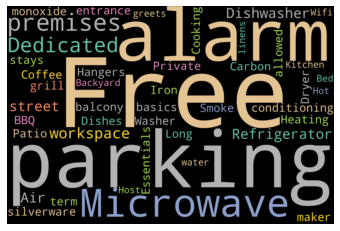

In [191]:
text = master_data['amenities'][0]

# Create and generate a word cloud image:
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', colormap='Set2', collocations=False).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [192]:
fin_list = []
for i in master_data['amenities']:
    fin_list.append(i)
    text = text+''.join(i)

In [193]:
len(fin_list)

198949

In [194]:
len(text)

92297679

In [195]:
text = text.replace('[' , '')
text = text.replace(']' , '')
len(text)

91899778

In [196]:
# adding word to remove them from display 
STOPWORDS.add('alarm')
STOPWORDS.add('allowed')
STOPWORDS.add('monxide')

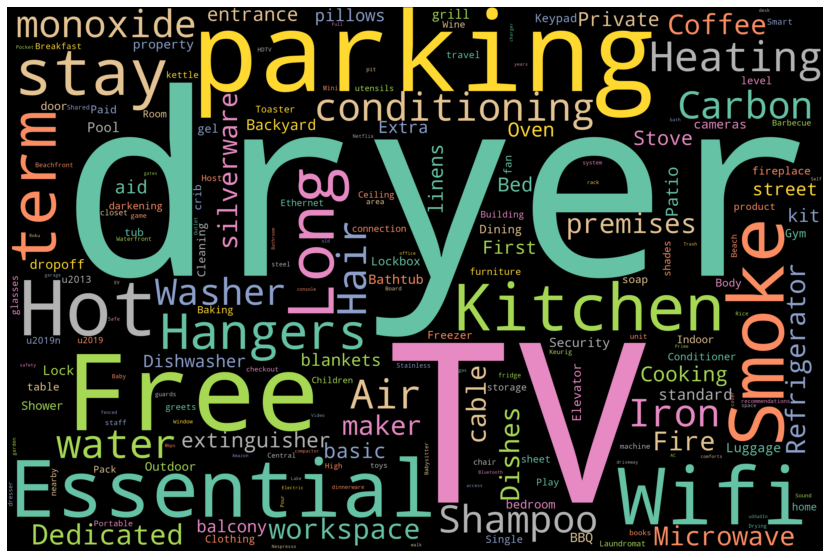

In [197]:
# Create and generate a word cloud image:

plt.figure(figsize = (20,10))
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', 
                      colormap='Set2', collocations=False).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [198]:
wordcloud.words_

{'dryer': 1.0,
 'TV': 0.7612348770980186,
 'parking': 0.7266062087212942,
 'Free': 0.6768495889802266,
 'Essential': 0.6706893417624367,
 'Wifi': 0.6702214322743094,
 'Hot': 0.6333912329246699,
 'Smoke': 0.62069371789434,
 'Kitchen': 0.5977223916570729,
 'stay': 0.5846478560319929,
 'Long': 0.5846175597342005,
 'term': 0.5846108272235799,
 'Hangers': 0.5614711882207994,
 'Heating': 0.5562164636814715,
 'water': 0.5373115738590077,
 'Hair': 0.5326156477011843,
 'Air': 0.5298889808998674,
 'conditioning': 0.529734133155595,
 'Iron': 0.5154309143422674,
 'Shampoo': 0.5089037452956582,
 'Carbon': 0.5037567409262588,
 'monoxide': 0.5037567409262588,
 'Washer': 0.47397548019632,
 'workspace': 0.47166286279816605,
 'Dedicated': 0.47143059118175756,
 'Coffee': 0.4521890758282671,
 'premises': 0.44522765984663343,
 'maker': 0.4336342765580713,
 'Refrigerator': 0.4268445395972612,
 'Dishes': 0.42239771633239753,
 'silverware': 0.42239435007708726,
 'Fire': 0.41917957625578156,
 'Microwave': 0.41

In [199]:
# converting amenities into count of amenities
amenities_count = []
for i in range(len(master_data)):
    amenities_count.append(len(master_data.amenities.values[i].split(sep = ',')))
    
master_data['amenities_count'] = amenities_count
master_data['amenities_count'].unique()

array([ 28,  26,  20,  16,  11,  35,  42,  19,  41,  24,  46,  17,  52,
        30,  34,  31,  45,  14,  56,  43,  18,  33,  32,  38,  27,  25,
        48,  39,  21,  44,  12,  55,  22,  53,  40,  29,  23,   9,  58,
        37,  36,  15,  49,  57,  60,  50,  47,  13,  59,  51,  54,  61,
        78,  83,  67,  10,  71,   8,  74,   5,  72,  65,  66,   7,  62,
        63,  73,   4,  64,  80,  82,   1,   6,   3,  77,  69,  75,   2,
        68,  76,  98,  70,  91, 100,  88,  84,  85,  86,  90,  79,  93,
        92,  94,  81,  87, 119,  95,  89], dtype=int64)

In [200]:
import re
from functools import reduce

In [201]:
# converting bathroom_text to count of bathroom 
bath_cnt = []
for i in master_data['bathrooms_text']:
    temp = re.findall(r'\d+', i)
    if temp == []:
        temp = '1'
    bath_cnt.append(float(reduce(lambda x,y:x+'.'+y ,temp)))
bath_cnt      

[1.0,
 1.0,
 2.5,
 2.5,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.5,
 1.5,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 3.0,
 2.5,
 2.0,
 1.5,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.5,
 1.0,
 1.0,
 1.0,
 1.0,
 1.5,
 1.0,
 1.0,
 1.0,
 1.5,
 1.0,
 1.0,
 1.5,
 1.0,
 1.0,
 1.0,
 1.5,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.5,
 2.0,
 1.0,
 1.0,
 2.0,
 2.0,
 1.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.5,
 2.0,
 3.5,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.5,
 2.0,
 1.0,
 1.5,
 1.0,
 1.0,
 1.0,
 3.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.5,
 1.0,
 1.0,
 1.0,
 3.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 2.5,
 1.5,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 3.5,
 1.0,
 1.0,
 3.0,
 1.0,
 1.0,
 3.0,
 1.0,
 1.0,
 1.5,
 1.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 1.5

In [202]:
master_data['bathrooms'] = bath_cnt

In [203]:
# final shape of master data 
master_data.shape

(198949, 43)

In [204]:
# to download master_Data
master_data.to_csv('master_Data.csv' , index = False)
# this data can be used for tableau dashbord

###  POWER TRANSFORMATION

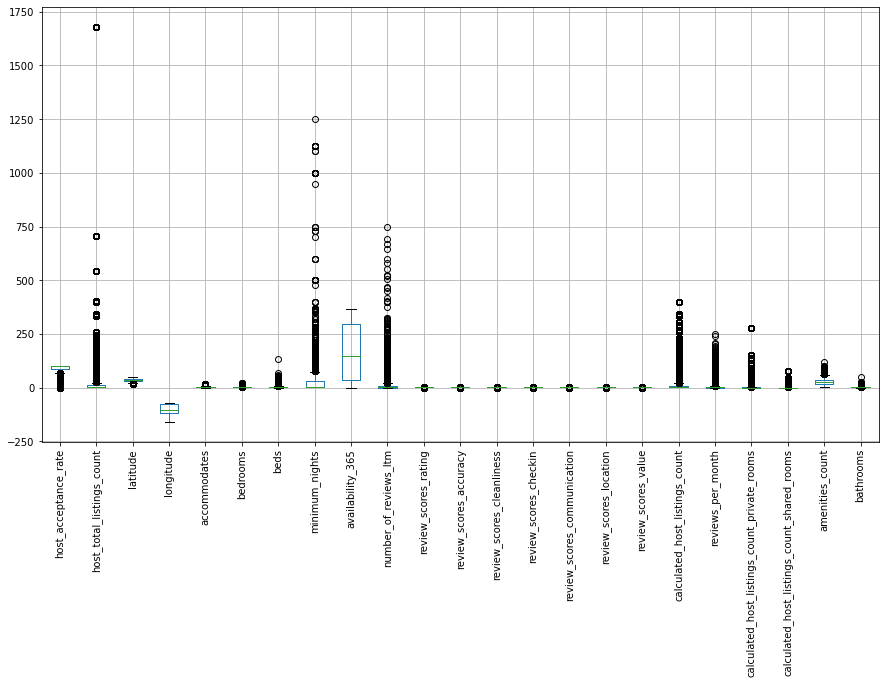

In [205]:
plt.figure(figsize=(15,8))
master_data.drop(['host_id','price'],axis=1).boxplot()
plt.xticks(rotation=90)
plt.show()

In [224]:
# Dividing the dataset into numerical and categorical dataframes
num_data = master_data.select_dtypes(include=np.number)
cat_data = master_data.select_dtypes(exclude=np.number)

In [225]:
# Shape of each dataframe

num_data.shape, cat_data.shape

((198949, 25), (198949, 18))

In [226]:
num_data.columns

Index(['host_id', 'host_acceptance_rate', 'host_total_listings_count',
       'latitude', 'longitude', 'accommodates', 'bedrooms', 'beds', 'price',
       'minimum_nights', 'availability_365', 'number_of_reviews_ltm',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'calculated_host_listings_count',
       'reviews_per_month', 'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'amenities_count',
       'bathrooms'],
      dtype='object')

In [227]:
cat_data.columns

Index(['host_since', 'host_location', 'host_response_time',
       'host_is_superhost', 'host_identity_verified', 'room_type',
       'bathrooms_text', 'amenities', 'has_availability', 'instant_bookable',
       'city', 'last_scraped', 'park_view', 'water_view', 'hill_view',
       'host_experience', 'landscape', 'city_tier'],
      dtype='object')

In [228]:
# We dont need to normalize these 4 features
# Storing them into a new dataframe
ntnorm_num = num_data.loc[:,['host_id','latitude','longitude','price']]

In [229]:
# Creating new dataframe for features to be transformed.

norm_num = num_data.drop(['host_id','latitude','longitude','price'],axis=1)

In [230]:
# Checking for shape of dataframe
ntnorm_num.shape, norm_num.shape

((198949, 4), (198949, 21))

In [231]:
# Dataframe before normalization
norm_num.head()

,host_acceptance_rate,host_total_listings_count,accommodates,bedrooms,beds,minimum_nights,availability_365,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,amenities_count,bathrooms
0,25,2,2,1.00000,1.00000,30,217,0,4.49000,4.57000,4.70000,4.85000,4.79000,4.84000,4.48000,2,0.75000,0,0,28,1.00000
1,99,7,2,1.00000,1.00000,1,130,70,4.57000,4.68000,4.38000,4.81000,4.76000,4.92000,4.51000,7,5.39000,2,4,26,1.00000
2,99,7,2,1.00000,1.00000,1,4,0,4.52000,4.73000,4.43000,4.76000,4.61000,4.84000,4.46000,7,3.09000,2,4,20,2.50000
3,99,7,1,1.00000,6.00000,1,174,8,4.70000,4.81000,4.65000,4.84000,4.80000,4.78000,4.79000,7,3.47000,2,4,16,2.50000
4,100,1,2,1.00000,1.00000,30,0,0,4.96000,4.77000,4.98000,4.94000,4.88000,4.90000,4.85000,1,0.49000,1,0,11,1.00000


In [232]:
# Power transformation
from sklearn.preprocessing import PowerTransformer
pt= PowerTransformer()
norm_num_done = pd.DataFrame(pt.fit_transform(norm_num),columns=norm_num.columns)

In [233]:
# Dataframe after normalization
norm_num_done.head()

,host_acceptance_rate,host_total_listings_count,accommodates,bedrooms,beds,minimum_nights,availability_365,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,amenities_count,bathrooms
0,-2.47401,-0.33101,-0.78634,-0.76212,-0.74693,1.25917,0.58263,-1.01621,-1.12823,-1.42903,-0.46848,-0.56856,-0.88876,-0.19471,-1.13662,-0.30202,-0.50157,-0.68342,-0.15316,0.04377,-0.59297
1,0.57644,0.68703,-0.78634,-0.76212,-0.74693,-1.22822,0.09393,1.70474,-0.87146,-1.01691,-1.46509,-0.86225,-1.06409,0.42473,-1.04375,0.74286,1.38050,1.47264,6.52910,-0.12332,-0.59297
2,0.57644,0.68703,-0.78634,-0.76212,-0.74693,-1.22822,-1.40644,-1.01621,-1.03566,-0.78479,-1.34881,-1.17165,-1.70661,-0.19471,-1.19569,0.74286,0.84870,1.47264,6.52910,-0.66130,1.48647
3,0.57644,0.68703,-1.83654,-0.76212,1.82520,-1.22822,0.35855,0.90837,-0.38065,-0.34221,-0.66932,-0.64621,-0.82606,-0.57477,0.12091,0.74286,0.96306,1.47264,6.52910,-1.05938,1.48647
4,0.66367,-0.96693,-0.78634,-0.76212,-0.74693,1.25917,-1.64872,-1.01621,0.93917,-0.57529,1.09901,0.27918,-0.23646,0.25646,0.45623,-0.96983,-0.81912,1.06186,-0.15316,-1.62225,-0.59297


In [234]:
# Verifing shape of data after transformation
norm_num_done.shape

(198949, 21)

In [235]:
# Concatinating all categorical and numerical(transformed + 4 non-transformed features) features into a new dataframe

ntnorm_num.reset_index(drop = True, inplace= True)
norm_num_done.reset_index(drop = True, inplace= True)
cat_data.reset_index(drop = True, inplace= True)

data_final = pd.concat([ntnorm_num,norm_num_done,cat_data],axis=1)

# Shape of data frame
data_final.shape

(198949, 43)

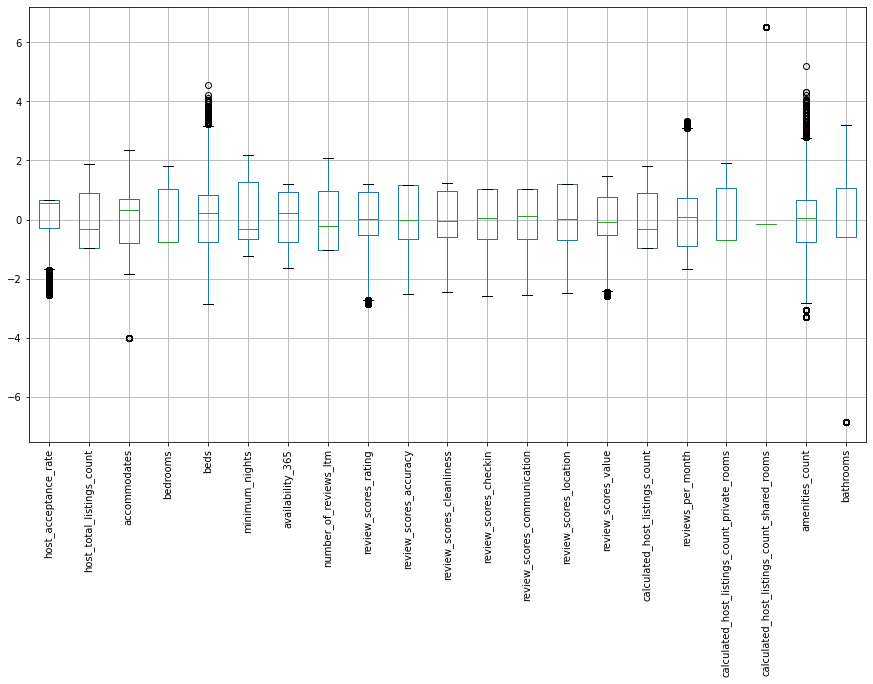

In [236]:
# Boxplot

plt.figure(figsize=(15,8))
data_final.drop(['host_id','latitude','longitude','price'],axis=1).boxplot()
plt.xticks(rotation=90)
plt.show()

**Observation:**
* We can see that outliers have significantly reduced after transformation.
* Now we can see a comparitively clean boxplot.

In [237]:
# Checking for null values
data_final.isnull().sum()

host_id                                         0
latitude                                        0
longitude                                       0
price                                           0
host_acceptance_rate                            0
host_total_listings_count                       0
accommodates                                    0
bedrooms                                        0
beds                                            0
minimum_nights                                  0
availability_365                                0
number_of_reviews_ltm                           0
review_scores_rating                            0
review_scores_accuracy                          0
review_scores_cleanliness                       0
review_scores_checkin                           0
review_scores_communication                     0
review_scores_location                          0
review_scores_value                             0
calculated_host_listings_count                  0


In [238]:
# Dropping neighbourhood and neighbourhood_group_cleansed
#data_final.drop(['neighbourhood','neighbourhood_group_cleansed'],axis=1,inplace=True)

In [239]:
# Shape of the data
data_final.shape

(198949, 43)

In [240]:
data_final.calculated_host_listings_count_shared_rooms.unique()

array([-0.15316043,  6.52910155,  6.52910147,  6.52910155,  6.52910155])

In [241]:
df_fin.calculated_host_listings_count_shared_rooms.unique()

array([ 0,  4,  1,  2, 46,  3, 12,  8,  7,  5, 16, 15,  6, 17, 10, 19, 11,
       29, 33, 18,  9, 36, 26, 23, 20, 75, 13, 41, 31, 28], dtype=int64)

### OUTLIER REMOVAL

In [242]:
# Shape of data before outlier removal
data_final.shape

(198949, 43)

In [243]:
# IQR Treatment

Q1 = data_final.quantile(0.25)
Q3 = data_final.quantile(0.75)
IQR = Q3 -Q1

LL = Q1 - 1.5*IQR
UL = Q3 + 1.5*IQR

In [244]:
# Number of outlier present in the data

len(data_final[((data_final < LL) | (data_final > UL)).any(axis=1)])

51941

In [245]:
# Creating a new dataframe free from outliers

data_wtoutliers = data_final[~((data_final < LL) | (data_final > UL)).any(axis=1)]  

In [246]:
# Shape of data without outliers

data_wtoutliers.shape

(147008, 43)

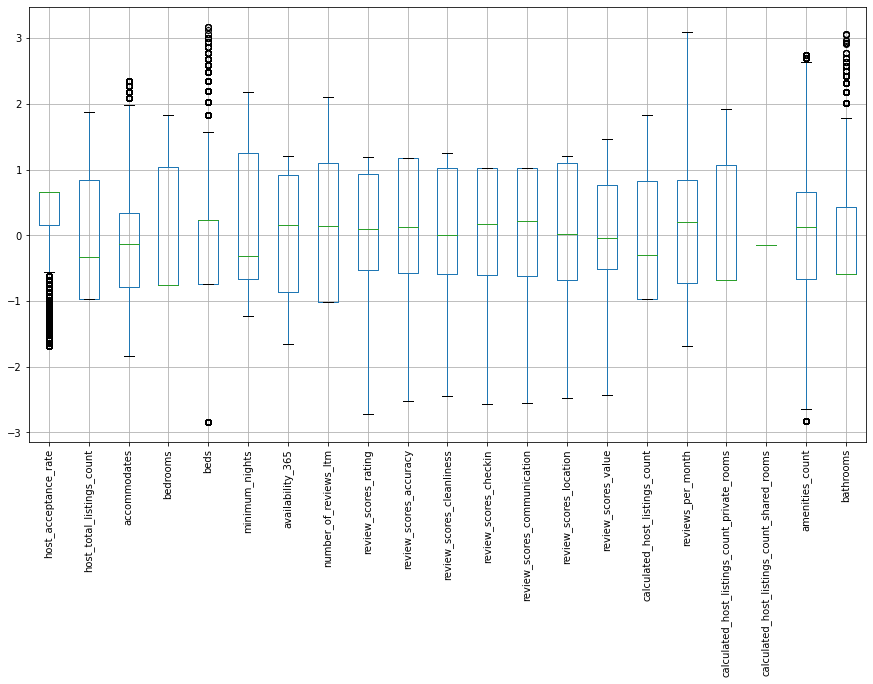

In [247]:
# Boxplot after IQR treatment.

plt.figure(figsize=(15,8))
data_wtoutliers.drop(['host_id','latitude','longitude','price'],axis=1).boxplot()
plt.xticks(rotation=90)
plt.show()

In [248]:
len(data_wtoutliers.columns)

43

In [249]:
# Creating a CSV file of without outliers data.
data_wtoutliers.to_csv('airbnb_final.csv' ,index = False )

In [250]:
df_final = pd.read_csv('airbnb_final.csv' )
df_final.head(2)

,host_id,latitude,longitude,price,host_acceptance_rate,host_total_listings_count,accommodates,bedrooms,beds,minimum_nights,availability_365,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,amenities_count,bathrooms,host_since,host_location,host_response_time,host_is_superhost,host_identity_verified,room_type,bathrooms_text,amenities,has_availability,instant_bookable,city,last_scraped,park_view,water_view,hill_view,host_experience,landscape,city_tier
0,769252,35.61442,-82.54127,125.00000,0.66367,-0.96693,-0.78634,-0.76212,-0.74693,1.25917,-1.64872,-1.01621,0.93917,-0.57529,1.09901,0.27918,-0.23646,0.25646,0.45623,-0.96983,-0.81912,1.06186,-0.15316,-1.62225,-0.59297,2011-07-02,"Asheville, North Carolina, United States",within an hour,f,f,Private room,1 bath,"[""Heating"", ""Fire extinguisher"", ""Wifi"", ""Lock...",f,f,Ashville,2021-07-10,0,0,0,old,Plain and Hilly area,Tier3
1,1292070,35.59635,-82.50655,68.00000,-0.80425,0.03329,-0.78634,-0.76212,-0.74693,-0.31442,-0.38634,-1.01621,-0.54213,-1.42903,-0.95191,-0.31718,-1.56771,-1.12114,-0.76924,0.07586,-0.71340,1.06186,-0.15316,0.04377,-0.59297,2011-10-14,"Asheville, North Carolina, United States",within an hour,f,f,Private room,1 shared bath,"[""Stove"", ""Microwave"", ""Free parking on premis...",t,f,Ashville,2021-07-10,0,0,0,old,Plain and Hilly area,Tier3


In [251]:
# drop the bathrooms_test
df_final.drop('bathrooms_text' , axis = 1 ,inplace = True)

In [252]:
# droping 
df_final.drop('amenities' , axis = 1 ,inplace = True)

In [253]:
df_final.head(2)

,host_id,latitude,longitude,price,host_acceptance_rate,host_total_listings_count,accommodates,bedrooms,beds,minimum_nights,availability_365,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,amenities_count,bathrooms,host_since,host_location,host_response_time,host_is_superhost,host_identity_verified,room_type,has_availability,instant_bookable,city,last_scraped,park_view,water_view,hill_view,host_experience,landscape,city_tier
0,769252,35.61442,-82.54127,125.00000,0.66367,-0.96693,-0.78634,-0.76212,-0.74693,1.25917,-1.64872,-1.01621,0.93917,-0.57529,1.09901,0.27918,-0.23646,0.25646,0.45623,-0.96983,-0.81912,1.06186,-0.15316,-1.62225,-0.59297,2011-07-02,"Asheville, North Carolina, United States",within an hour,f,f,Private room,f,f,Ashville,2021-07-10,0,0,0,old,Plain and Hilly area,Tier3
1,1292070,35.59635,-82.50655,68.00000,-0.80425,0.03329,-0.78634,-0.76212,-0.74693,-0.31442,-0.38634,-1.01621,-0.54213,-1.42903,-0.95191,-0.31718,-1.56771,-1.12114,-0.76924,0.07586,-0.71340,1.06186,-0.15316,0.04377,-0.59297,2011-10-14,"Asheville, North Carolina, United States",within an hour,f,f,Private room,t,f,Ashville,2021-07-10,0,0,0,old,Plain and Hilly area,Tier3


In [254]:
len(df_final.columns)

41

In [255]:
# converting host_acceptance_rate into numerical variable
df_final['host_acceptance_rate'].replace({'%': ''} , inplace =True ,regex = True)
df_final['host_acceptance_rate'] = df_final['host_acceptance_rate'].astype(int64)

In [256]:
df_final.columns

Index(['host_id', 'latitude', 'longitude', 'price', 'host_acceptance_rate',
       'host_total_listings_count', 'accommodates', 'bedrooms', 'beds',
       'minimum_nights', 'availability_365', 'number_of_reviews_ltm',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'calculated_host_listings_count',
       'reviews_per_month', 'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'amenities_count',
       'bathrooms', 'host_since', 'host_location', 'host_response_time',
       'host_is_superhost', 'host_identity_verified', 'room_type',
       'has_availability', 'instant_bookable', 'city', 'last_scraped',
       'park_view', 'water_view', 'hill_view', 'host_experience', 'landscape',
       'city_tier'],
      dtype='object')

In [258]:
# droping some non useful columns before model buildings

df_final =df_final.drop(['host_id' , 'latitude' , 'longitude' , 'host_since' , 'host_location' , 'last_scraped'
                    , 'landscape', 'city'] , axis = 1)

In [259]:
#df_final = df_final.drop('neighbourhood' , axis = 1)

## encoding

In [275]:
# changing the data type of few variable 
df_final['instant_bookable'] = df_final['instant_bookable'].replace({'t':1 , 'f':0}).astype(int64)
df_final['host_is_superhost'] = df_final['host_is_superhost'].replace({'t':1 , 'f':0}).astype(int64)
df_final['host_identity_verified'] = df_final['host_identity_verified'].replace({'t':1 , 'f':0}).astype(int64)
df_final['has_availability'] = df_final['has_availability'].replace({'t':1 , 'f':0}).astype(int64)
df_final['host_experience'] = df_final['host_experience'].replace({'old':0 , 'new':1}).astype(int64)

In [278]:
df_final['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Hotel room'], dtype=object)

In [399]:
df_final.columns

Index(['price', 'host_acceptance_rate', 'host_total_listings_count',
       'accommodates', 'bedrooms', 'beds', 'minimum_nights',
       'availability_365', 'number_of_reviews_ltm', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',
       'calculated_host_listings_count', 'reviews_per_month',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'amenities_count',
       'bathrooms', 'host_response_time', 'host_is_superhost',
       'host_identity_verified', 'room_type', 'has_availability',
       'instant_bookable', 'park_view', 'water_view', 'hill_view',
       'host_experience', 'city_tier'],
      dtype='object')

In [279]:
print("shape of data before encoding - " , df_final.shape)
df_dum = pd.get_dummies(df_final , drop_first = True)

shape of data before encoding -  (147008, 33)


In [280]:
print("shape of data after encoding - " , df_dum.shape)
df_dum.head()

shape of data after encoding -  (147008, 38)


,price,host_acceptance_rate,host_total_listings_count,accommodates,bedrooms,beds,minimum_nights,availability_365,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,amenities_count,bathrooms,host_is_superhost,host_identity_verified,has_availability,instant_bookable,park_view,water_view,hill_view,host_experience,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,room_type_Hotel room,room_type_Private room,city_tier_Tier2,city_tier_Tier3,city_tier_Tier4
0,125.00000,0,-0.96693,-0.78634,-0.76212,-0.74693,1.25917,-1.64872,-1.01621,0.93917,-0.57529,1.09901,0.27918,-0.23646,0.25646,0.45623,-0.96983,-0.81912,1.06186,-0.15316,-1.62225,-0.59297,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0
1,68.00000,0,0.03329,-0.78634,-0.76212,-0.74693,-0.31442,-0.38634,-1.01621,-0.54213,-1.42903,-0.95191,-0.31718,-1.56771,-1.12114,-0.76924,0.07586,-0.71340,1.06186,-0.15316,0.04377,-0.59297,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0
2,76.00000,0,-0.96693,-0.78634,-0.76212,-0.74693,-1.22822,0.18296,1.58533,0.76003,0.78666,0.56267,0.75775,0.77332,0.33941,1.17043,-0.96983,2.33620,-0.68342,-0.15316,1.09291,-0.59297,1,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0
3,125.00000,0,-0.96693,-0.78634,-0.76212,-0.74693,-0.66224,0.98921,0.90837,1.06297,1.16964,1.24619,1.02499,0.22494,0.51250,0.63764,-0.96983,1.62945,-0.68342,-0.15316,-0.29606,-0.59297,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
4,124.00000,0,0.27476,-0.78634,-0.76212,-0.74693,-0.66224,1.19255,0.54037,-0.38065,-0.51932,0.56267,0.06534,-0.55191,-2.13616,-0.97889,-0.30202,-0.33804,1.47264,-0.15316,1.36305,0.43326,1,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0


In [281]:
df_dum.to_csv('airbnb_encoded.csv' , index=False )

## Basic model building 

In [2]:
df_dum = pd.read_csv('airbnb_encoded.csv')
df_dum.shape

(147008, 38)

In [3]:
# spliting data 
x = df_dum.drop('price', axis = 1)
y = df_dum['price']

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 10)

In [5]:
# basic model 
x = sm.add_constant(X_train)
base_mod = sm.OLS(y_train,x).fit()
base_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     2748.
Date:                Sun, 03 Oct 2021   Prob (F-statistic):               0.00
Time:                        20:19:01   Log-Likelihood:            -6.7374e+05
No. Observations:              117606   AIC:                         1.348e+06
Df Residuals:                  117569   BIC:                         1.348e+06
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
host_acceptance_rate                            -1.5607      0.929     -1.681      0.093      -3.381       0.259
host_total_listings_count                       30.6636      1.636     18.739      0.000      27.456      33.871
accommodates                                    26.0971      0.442     59.043      0.000      25.231      26.963
bedrooms                                        14.9683      0.398     37.574      0.000      14.187      15.749
beds                                             5.9331      0.375     15.828      0.000       5.198       6.668
minimum_nights                                 -11.1177      0.265    -41.971      0.000     -11.637     -10.598
availability_365                                 5.0296      0.252     19.966      0.000       4.536       5.523
number_of_reviews_ltm                          -13.7003      0.303    -45.282      0.000     -14.293     -13.107
review_scores_rating                            11.6502      0.472     24.664      0.000      10.724      12.576
review_scores_accuracy                          -0.0674      0.383     -0.176      0.861      -0.819       0.684
review_scores_cleanliness                        3.7900      0.334     11.355      0.000       3.136       4.444
review_scores_checkin                           -4.1562      0.327    -12.695      0.000      -4.798      -3.515
review_scores_communication                     -2.5241      0.355     -7.118      0.000      -3.219      -1.829
review_scores_location                          13.2404      0.267     49.558      0.000      12.717      13.764
review_scores_value                            -16.0637      0.353    -45.487      0.000     -16.756     -15.372
calculated_host_listings_count                 -23.3040      1.637    -14.233      0.000     -26.513     -20.095
reviews_per_month                               -1.0336      0.273     -3.785      0.000      -1.569      -0.498
calculated_host_listings_count_private_rooms    -6.6272      0.466    -14.228      0.000      -7.540      -5.714
calculated_host_listings_count_shared_rooms  -1297.4000     16.149    -80.339      0.000   -1329.052   -1265.748
amenities_count                                  1.1526      0.269      4.285      0.000       0.625       1.680
bathrooms                                       21.8818      0.365     59.958      0.000      21.167      22.597
host_is_superhost                                3.6362      0.542      6.715      0.000       2.575       4.698
host_identity_verified                           4.2159      0.567      7.432      0.000       3.104       5.328
has_availability                               -17.9472      1.594    -11.260      0.000     -21.071     -14.823
instant_bookable                

In [6]:
# infernce 
1. model has lower R-squared which means model will not able to perform well on test data.
2. review_scores_accuracy , host_response_time_within a day these variable are not significatent in price prediction. 
3. Large J-B value indicates that errors are not normally distributed.
4. The condition number is large,means strong multicollinearity between the variable.

SyntaxError: invalid syntax (Temp/ipykernel_6140/1300051587.py, line 2)

In [ ]:
### assumptions test

In [ ]:
#1. Linearity 
import statsmodels.api as smodels

In [ ]:
fstat  , pvalue  = smodels.stats.diagnostic.linear_rainbow(base_mod)

print(f"f-stats is {fstat} and pvalue is {pvalue}")

# this test gives that p< .05  --> means we reject the H0 
# which means model is not linear

In [ ]:
# normailty 
from scipy import stats 

stats.shapiro(y)

In [ ]:
stats.shapiro(base_mod.resid)

In [ ]:
# mulicoolinerity

plt.figure(figsize = (15,15))
sns.heatmap (x.corr() > .7 , annot = True)

# strong mulicoolinerity is present.

##### PCA

In [7]:
from sklearn.decomposition import PCA

In [8]:
model = PCA(n_components=25).fit(X_train)
X_pc = model.transform(X_train)

# number of components
n_pcs= model.components_.shape[0]

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = X_train.columns
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df_imp_feat = pd.DataFrame(dic.items() , columns = ['PC_order' , 'Column_name'])

In [9]:
X_train.columns

Index(['host_acceptance_rate', 'host_total_listings_count', 'accommodates',
       'bedrooms', 'beds', 'minimum_nights', 'availability_365',
       'number_of_reviews_ltm', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',
       'calculated_host_listings_count', 'reviews_per_month',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'amenities_count',
       'bathrooms', 'host_is_superhost', 'host_identity_verified',
       'has_availability', 'instant_bookable', 'park_view', 'water_view',
       'hill_view', 'host_experience', 'host_response_time_within a day',
       'host_response_time_within a few hours',
       'host_response_time_within an hour', 'room_type_Hotel room',
       'room_type_Private room', 'city_tier_Tier2', 'city_tier_Tier3',
       'city_tier_Tier4'],
   

In [10]:
set(most_important_names)

{'accommodates',
 'amenities_count',
 'availability_365',
 'bathrooms',
 'bedrooms',
 'calculated_host_listings_count',
 'calculated_host_listings_count_private_rooms',
 'host_identity_verified',
 'host_is_superhost',
 'host_response_time_within a day',
 'instant_bookable',
 'number_of_reviews_ltm',
 'park_view',
 'review_scores_accuracy',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_rating',
 'review_scores_value',
 'reviews_per_month',
 'water_view'}

In [11]:
sum(model.explained_variance_ratio_)
# total of 98.48 % of variance is explained by 25 feature so just selecting those only feature for model building.

0.9847418915279252

In [12]:
imp_feat = list(set(df_imp_feat.Column_name))
imp_feat

['review_scores_value',
 'park_view',
 'reviews_per_month',
 'calculated_host_listings_count',
 'review_scores_checkin',
 'availability_365',
 'host_is_superhost',
 'review_scores_communication',
 'water_view',
 'review_scores_rating',
 'host_identity_verified',
 'number_of_reviews_ltm',
 'bedrooms',
 'review_scores_accuracy',
 'accommodates',
 'review_scores_location',
 'instant_bookable',
 'host_response_time_within a day',
 'amenities_count',
 'calculated_host_listings_count_private_rooms',
 'bathrooms']

<AxesSubplot:>

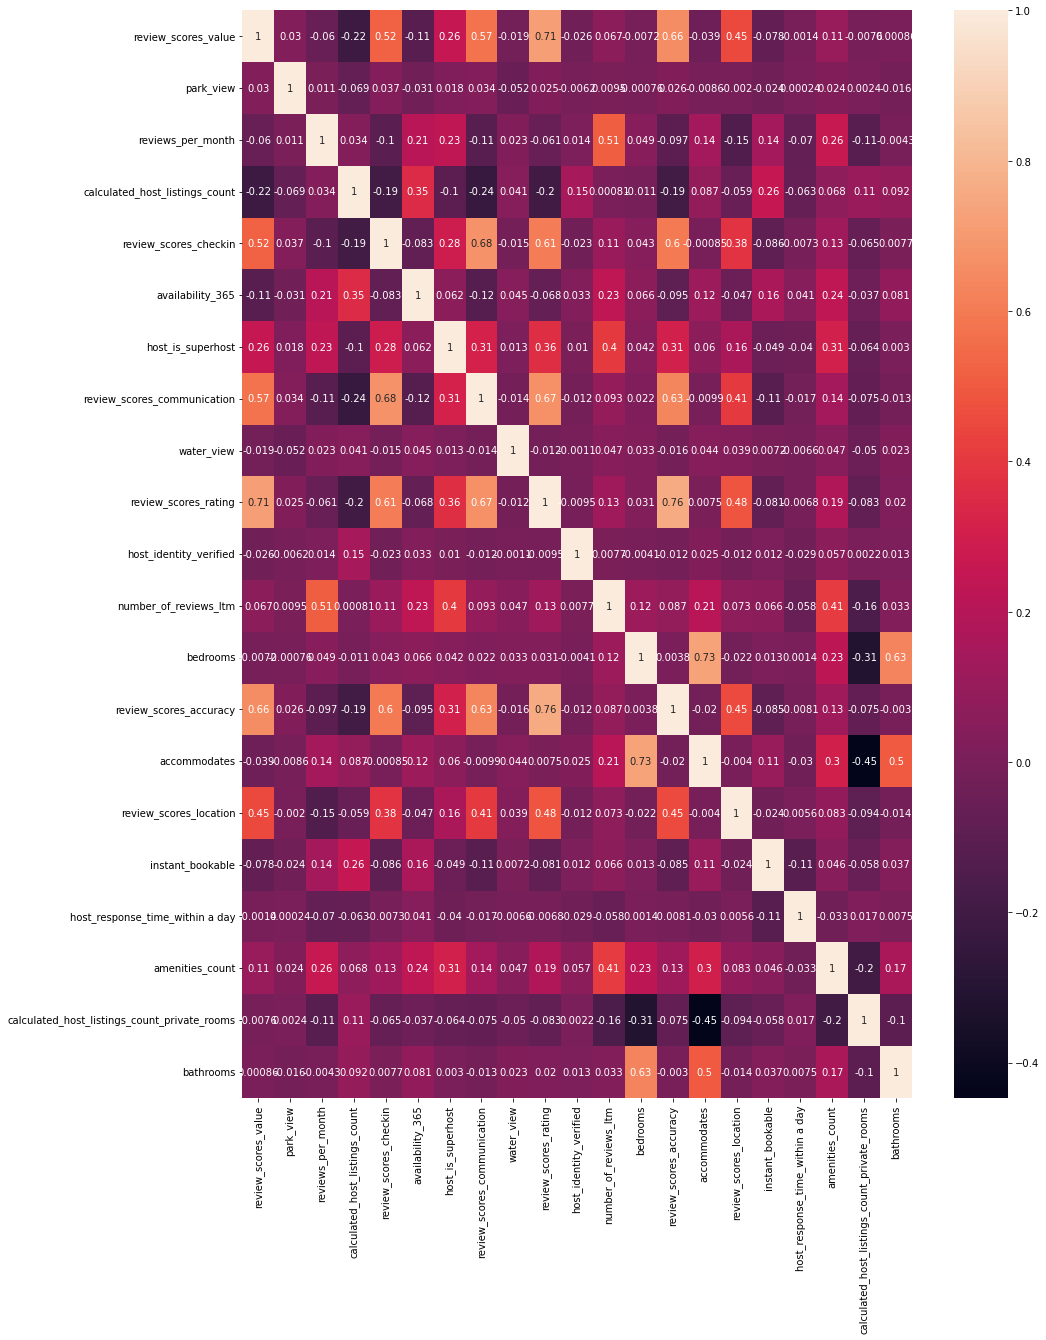

In [13]:
plt.figure(figsize = (15,20))
sns.heatmap(df_dum[imp_feat].corr() , annot = True)

## Vif

In [14]:
# there is still some variable showing coolinerilty. 
# so we need to use VIF to remove that. 

In [21]:
vif = pd.DataFrame()
vif['features'] = df_dum[imp_feat].columns
vif['VIF values'] = [variance_inflation_factor(df_dum[imp_feat].values,i) for i in range(df_dum[imp_feat].shape[1])]
vif.sort_values(by= 'VIF values' ,  ascending = False)

#A value greater than 5 indicates potentially severe correlation between a given explanatory variable

,features,VIF values
9,review_scores_rating,3.424168
12,bedrooms,2.795849
13,review_scores_accuracy,2.771853
14,accommodates,2.670825
7,review_scores_communication,2.446771
0,review_scores_value,2.332161
10,host_identity_verified,2.155984
4,review_scores_checkin,2.105899
6,host_is_superhost,2.027371
20,bathrooms,1.788688


In [20]:
#so it is clear there is no severe correlation between variable.

In [18]:
# redefining X and Y 
x_new = df_dum[imp_feat]
y = df_dum['price']

In [301]:
X_train,X_test,y_train,y_test = train_test_split(x_new,y,test_size = 0.2,random_state = 10)

In [302]:
#from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
y_pred_test = rf.fit(X_train,y_train).predict(X_test)

In [303]:
rf_r2score = r2_score(y_test,y_pred_test)
rf_rmse = np.sqrt(mean_squared_error(y_test,y_pred_test))

In [304]:
rf_rmse

66.86242963875658

In [305]:
rf_r2score

0.565396486853854

In [44]:
score_card_test

,Model_Name,R-Squared,Adj. R-Squared,RMSE


In [36]:
# defining a function to get the R2_score , adj R2_score and RMSE value for given model
# to use this function we must have defined model instance. 
# pararmeter -->
# mod_instance -> dt , rf  etc
# model name = model name in string, 
# y = target variable 
# X = other then target feature

score_card_test = pd.DataFrame(columns=['Model_Name', 'R-Squared_test', 'Adj. R-Squared_test', 'RMSE_test'])
score_card_train = pd.DataFrame(columns=['Model_Name', 'R-Squared_train', 'Adj. R-Squared_train', 'RMSE_train'])

def model_score(mod_int,model_nm,y,X):
    global score_card_test,score_card_train
    
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 10)
    mod_fitted = mod_int.fit(X_train,y_train)
    print(f"{model_nm} has been successfully fitted")
    y_pred_train = mod_fitted.predict(X_train)
    y_pred_test = mod_fitted.predict(X_test)
    
# this is for train data score     
    metrics = pd.Series({
                     'Model_Name': model_nm,
                     'RMSE_train':np.sqrt(mean_squared_error(y_train,y_pred_train)),
                     'R-Squared_train': r2_score(y_train,y_pred_train),
                     'Adj. R-Squared_train': 1 - (1-r2_score(y_train, y_pred_train)) * (len(y)-1)/(len(y)-X.shape[1]-1)     
                   })
    score_card_train = score_card_train.append(metrics, ignore_index=True)
    
# this is for test data score 

    metrics = pd.Series({
                     'Model_Name': model_nm,
                     'RMSE_test':np.sqrt(mean_squared_error(y_test,y_pred_test)),
                     'R-Squared_test': r2_score(y_test,y_pred_test),
                     'Adj. R-Squared_test': 1 - (1-r2_score(y_test, y_pred_test)) * (len(y)-1)/(len(y)-X.shape[1]-1)     
                   })
    score_card_test = score_card_test.append(metrics, ignore_index=True)
        
    return score_card_train ,score_card_test


In [38]:
#mod 1 - LinerRegression 

lr =LinearRegression()
score_card_train ,score_card_test = model_score(lr ,'Linear Regression',y,x_new)
cv_result = cross_val_score(lr, X_train, y_train)
print("cv mean score is  - " , cross_val_score(lr, X_train, y_train).mean())

Liner Regression has been successfully fitted


In [45]:
cv_result = cross_val_score(lr, X_train, y_train)
cv_result.mean()

0.45641010483167604

In [39]:
score_card_train

,Model_Name,R-Squared_train,Adj. R-Squared_train,RMSE_train
0,Liner Regression,0.438914,0.438833,75.654382


In [40]:
score_card_test

,Model_Name,R-Squared_test,Adj. R-Squared_test,RMSE_test
0,Liner Regression,0.445173,0.445093,75.546528


In [46]:
# mod 2 
from sklearn.tree import DecisionTreeRegressor

dt =DecisionTreeRegressor()
score_card_train ,score_card_test = model_score(dt ,'DecisionTree Regressor',y,x_new)
cv_result = cross_val_score(dt, X_train, y_train)
print("cv mean score is  - " , cv_result.mean())

DecisionTree Regressor has been successfully fitted
cv mean score is  -  0.17326590470520317


In [47]:
score_card_train

,Model_Name,R-Squared_train,Adj. R-Squared_train,RMSE_train
0,Liner Regression,0.438914,0.438833,75.654382
1,DecisionTree Regressor,0.992102,0.992101,8.975936


In [48]:
score_card_test

,Model_Name,R-Squared_test,Adj. R-Squared_test,RMSE_test
0,Liner Regression,0.445173,0.445093,75.546528
1,DecisionTree Regressor,0.151119,0.150998,93.445616


In [50]:
# mod 3 
from sklearn.ensemble import RandomForestRegressor

rf =RandomForestRegressor()
score_card_train ,score_card_test = model_score(rf ,'RandomForest Regressor',y,x_new)
cv_result = cross_val_score(rf, X_train, y_train , cv = 5)
print("cv mean score is  - " , cv_result.mean())

cv mean score is  -  0.5917038003462493


In [51]:
# mod 4 
from sklearn.ensemble import AdaBoostRegressor

abr =AdaBoostRegressor()
score_card_train ,score_card_test = model_score(abr ,'AdaBoost Regressor',y,x_new)
cv_result = cross_val_score(abr, X_train, y_train ,cv = 5)
print("cv mean score is  - " , cv_result.mean())

AdaBoost Regressor has been successfully fitted
cv mean score is  -  0.26544827187889386


In [53]:
score_card_train

,Model_Name,R-Squared_train,Adj. R-Squared_train,RMSE_train
0,Liner Regression,0.438914,0.438833,75.654382
1,DecisionTree Regressor,0.992102,0.992101,8.975936
2,RandomForest Regressor,0.932528,0.932518,26.234984
3,AdaBoost Regressor,0.310857,0.310758,83.844377


In [52]:
score_card_test

,Model_Name,R-Squared_test,Adj. R-Squared_test,RMSE_test
0,Liner Regression,0.445173,0.445093,75.546528
1,DecisionTree Regressor,0.151119,0.150998,93.445616
2,RandomForest Regressor,0.565495,0.565433,66.854836
3,AdaBoost Regressor,0.310564,0.310466,84.213628


In [55]:
# mod 5 
from sklearn.neighbors import KNeighborsRegressor
knn  =KNeighborsRegressor(n_neighbors = 5)

score_card_train ,score_card_test = model_score(knn ,'KNeighbors Regressor',y,x_new)
cv_result = cross_val_score(knn, X_train, y_train)
print("cv mean score is  - " , cv_result.mean())

KNeighbors Regressor has been successfully fitted
cv mean score is  -  0.4928058320961977


In [58]:
#mod 6
from sklearn.ensemble import GradientBoostingRegressor

Gbr = GradientBoostingRegressor()

score_card_train ,score_card_test = model_score(Gbr ,'GradientBoosting Regressor',y,x_new)
cv_result = cross_val_score(Gbr, X_train, y_train)
print("cv mean score is  - " , cv_result.mean())

GradientBoosting Regressor has been successfully fitted
cv mean score is  -  0.5264606009636774


In [61]:
#mod 7 
from xgboost import XGBRegressor
xgb = XGBRegressor()

score_card_train ,score_card_test = model_score(xgb ,'XGradientBoosting Regressor',y,x_new)
cv_result = cross_val_score(xgb, X_train, y_train)
print("cv mean score is  - " , cv_result.mean())

XGradientBoosting Regressor has been successfully fitted
cv mean score is  -  0.6011021591642723


In [62]:
#mod 8  
from sklearn.linear_model import Ridge
ridge = Ridge()
score_card_train ,score_card_test = model_score(ridge ,'Ridge Regressor',y,x_new)
cv_result = cross_val_score(ridge, X_train, y_train)
print("cv mean score is  - " , cv_result.mean())

Ridge Regressor has been successfully fitted
cv mean score is  -  0.4564102844956162


In [63]:
#mod 9  
from sklearn.linear_model import Lasso
lasso = Lasso()
score_card_train ,score_card_test = model_score(lasso ,'lasso Regressor',y,x_new)
cv_result = cross_val_score(lasso, X_train, y_train)
print("cv mean score is  - " , cv_result.mean())

lasso Regressor has been successfully fitted
cv mean score is  -  0.4452207620653275


In [64]:
#mod 10  
from sklearn.linear_model import ElasticNet
elasticNet = ElasticNet()
score_card_train ,score_card_test = model_score(elasticNet ,'ElasticNet Regressor',y,x_new)
cv_result = cross_val_score(elasticNet, X_train, y_train)
print("cv mean score is  - " , cv_result.mean())

ElasticNet Regressor has been successfully fitted
cv mean score is  -  0.41865249649271463


In [70]:
# mod 11
from sklearn.svm import LinearSVR
svm = LinearSVR()
score_card_train ,score_card_test = model_score(svm ,'SVM Regressor',y,x_new)
cv_result = cross_val_score(svm, X_train, y_train)
print("cv mean score is  - " , cv_result.mean())

SVM Regressor has been successfully fitted
cv mean score is  -  0.43095221062107114


In [69]:
#mod last 
from sklearn.ensemble import StackingRegressor

base_learners = [('rf_model', RandomForestRegressor( max_depth = 10, max_features = 'sqrt', 
                                                     max_leaf_nodes = 8, min_samples_leaf = 5, min_samples_split = 2, 
                                                     n_estimators = 50, random_state = 10)),
                 ('KNN_model', KNeighborsRegressor(n_neighbors = 17, metric = 'euclidean')),
                 ('LR_model', LinearRegression())]

# initialize stacking classifier 
# pass the base learners to the parameter, 'estimators'
# pass the Naive Bayes model as the 'final_estimator'/ meta model
stack_model = StackingRegressor(estimators = base_learners, final_estimator = XGBRegressor(max_depth =6, alpha = 10, n_estimators = 8))


score_card_train ,score_card_test = model_score(stack_model ,'stack_model Regressor',y,x_new)
cv_result = cross_val_score(stack_model, X_train, y_train)
print("cv mean score is  - " , cv_result.mean())

stack_model Regressor has been successfully fitted
cv mean score is  -  0.5249241312367535


In [71]:
score_card_train

,Model_Name,R-Squared_train,Adj. R-Squared_train,RMSE_train
0,Liner Regression,0.438914,0.438833,75.654382
1,DecisionTree Regressor,0.992102,0.992101,8.975936
2,RandomForest Regressor,0.932528,0.932518,26.234984
3,AdaBoost Regressor,0.310857,0.310758,83.844377
4,KNeighbors Regressor,0.643039,0.642988,60.343348
5,GradientBoosting Regressor,0.505734,0.505663,71.006755
6,XGradientBoosting Regressor,0.630419,0.630366,61.400840
7,Ridge Regressor,0.438914,0.438833,75.654382
8,lasso Regressor,0.433405,0.433324,76.024825
9,ElasticNet Regressor,0.405572,0.405487,77.869761


In [73]:
score_card_test

,Model_Name,R-Squared_test,Adj. R-Squared_test,RMSE_test
0,Liner Regression,0.445173,0.445093,75.546528
1,DecisionTree Regressor,0.151119,0.150998,93.445616
2,RandomForest Regressor,0.565495,0.565433,66.854836
3,AdaBoost Regressor,0.310564,0.310466,84.213628
4,KNeighbors Regressor,0.462320,0.462243,74.369974
5,GradientBoosting Regressor,0.506868,0.506798,71.222480
6,XGradientBoosting Regressor,0.580628,0.580568,65.680298
7,Ridge Regressor,0.445172,0.445093,75.546534
8,lasso Regressor,0.438893,0.438813,75.972860
9,ElasticNet Regressor,0.409750,0.409666,77.920804


# How to improve the Accuracy of these models. ?

In [ ]:
#Method 1  --> tunning best result model using GSCV
from sklearn.model_selection import GridSearchCV

tuned_paramaters = [{'criterion': ['entropy', 'gini'],
                     'n_estimators': [10, 30, 50, 70, 90],
                     'max_depth': [10, 15, 20 , 30,40,50,60,70],
                     'max_features': ['sqrt', 'log2'],
                     'min_samples_split': [2, 5, 8, 11 , 15 , 20],
                     'min_samples_leaf': [1, 5, 9],
                     'max_leaf_nodes': [2, 5, 8, 11]}]

grid = GridSearchCV(estimator=rf, param_grid=tuned_paramaters,
                   cv = 10, scoring = "neg_mean_squared_error") # RMSE

rf_grid_model = grid.fit(X_train, y_train)

#grid.fit(X, y)
print("Best Parameter: ", rf_grid_model.best_params_)

In [ ]:
rf_model = RandomForestRegressor(criterion = rf_grid_model.best_params_.get('criterion'), 
                                  n_estimators = rf_grid_model.best_params_.get('n_estimators'),
                                  max_depth = rf_grid_model.best_params_.get('max_depth'),
                                  max_features = rf_grid_model.best_params_.get('max_features'),
                                  max_leaf_nodes = rf_grid_model.best_params_.get('max_leaf_nodes'),
                                  min_samples_leaf = rf_grid_model.best_params_.get('min_samples_leaf'),
                                  min_samples_split = rf_grid_model.best_params_.get('min_samples_split'),
                                  random_state = 10)

# use fit() to fit the model on the train set
score_card_train ,score_card_test = model_score(rf_model ,'GSCV randomForest Regressor',y,x_new)
cv_result = cross_val_score(rf_model, X_train, y_train)
print("cv mean score is  - " , cv_result.mean())